In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Eniola\Downloads\archive (11)\Wprld population growth rate by cities 2024.csv')
pd.set_option('display.max_columns',None)
df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


In [3]:
df.shape

(801, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [5]:
# Get descriptive statistics
df.describe()

,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


In [6]:
# Check for missing values
df.isnull().sum()

City                  0
Country               0
Continent            11
Population (2024)     0
Population (2023)     0
Growth Rate           0
dtype: int64

In [7]:
#lets check out what values are missing and decide how to clean.
df.loc[df.Continent.isnull()]

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
133,Santo Domingo,Dominican Republic,NaN,3587402,3523890,0.0180
146,Ouagadougou,Burkina Faso,NaN,3358934,3203923,0.0484
184,Manchester,United Kingdom,NaN,2811756,2791005,0.0074
187,Brazzaville,Republic of the Congo,NaN,2724566,2637733,0.0329
313,Glasgow,United Kingdom,NaN,1708147,1698088,0.0059
400,Pointe Noire,Republic of the Congo,NaN,1379368,1336387,0.0322
424,Prague,Czech Republic,NaN,1327947,1323339,0.0035
604,Bangui,Central African Republic,NaN,985965,958335,0.0288
628,Southampton,United Kingdom,NaN,959202,951531,0.0081
718,Newcastle Upon Tyne,United Kingdom,NaN,828712,823431,0.0064


## Instead of dropping the null values we can fill with their respective continents Using the REST Countries API to get country and continent information and then Combine the primary dataset with the fetched data to fill in the missing continent information.



In [8]:
# Fetch country data from REST Countries API
response = requests.get("https://restcountries.com/v3.1/all")
country_data = response.json()

# Create a DataFrame from the fetched data
countries = []
for country in country_data:
    countries.append({
        'Country': country.get('name', {}).get('common', ''),
        'Continent': country.get('region', '')
    })

country_df = pd.DataFrame(countries)


# Merge the datasets on the Country column
merged_data = pd.merge(df, country_df, on='Country', how='left')
merged_data

,City,Country,Continent_x,Population (2024),Population (2023),Growth Rate,Continent_y
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021,Asia
1,Delhi,India,Asia,33807403,32941309,0.0263,Asia
2,Shanghai,China,Asia,29867918,29210808,0.0225,Asia
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313,Asia
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083,Americas
...,...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195,Asia
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073,Europe
798,Huambo,Angola,Africa,751297,727641,0.0325,Africa
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109,Americas


In [9]:
# Replace null values in Continent_x with values from Continent_y
merged_data['Continent_x'].fillna(merged_data['Continent_y'], inplace=True)
merged_data.loc[merged_data.Continent_x.isnull()]


,City,Country,Continent_x,Population (2024),Population (2023),Growth Rate,Continent_y
424,Prague,Czech Republic,NaN,1327947,1323339,0.0035,NaN


In [10]:
# Fill remaining null values in Continent_x with Europe since we already know Czech republic is in Europe.
merged_data.Continent_x.fillna('Europe',inplace=True)
merged_data.loc[merged_data.Continent_x.isnull()]

,City,Country,Continent_x,Population (2024),Population (2023),Growth Rate,Continent_y


In [11]:
#Restore Data back to original shape dropping 'Continent_y' and  renaming Continent_x
merged_data=merged_data[["City", "Country", "Continent_x", 'Population (2024)','Population (2023)','Growth Rate']]
merged_data.rename(columns={'Continent_x':'Continent'},inplace=True)
df=merged_data.copy()
df

C:\Users\ijd\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


In [12]:
df.isnull().sum()

City                 0
Country              0
Continent            0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

<AxesSubplot:title={'center':'Growth Rate'}, xlabel='[Country]'>

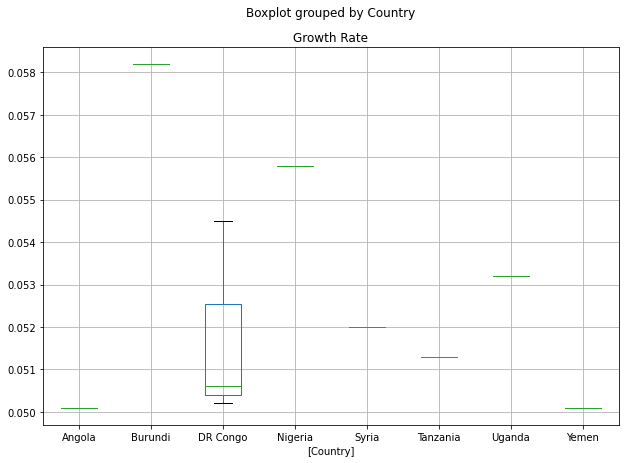

In [13]:
# Boxplot for the top 10 countries by growth rate
df.head()
newdf=df.sort_values(by='Growth Rate', ascending=False).head(10)
newdf[['Country','Growth Rate']].boxplot(by='Country',figsize=(10,7))

<AxesSubplot:title={'center':'Growth Rate'}, xlabel='[Country]'>

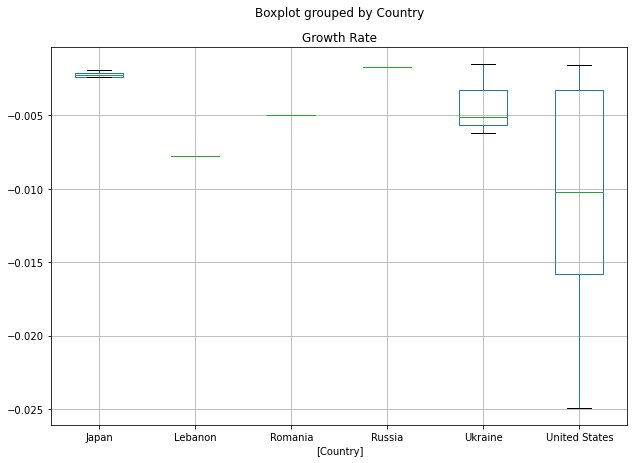

In [104]:
# Boxplot for the Countires with the lowest growth rate
df.head()
newdf=df.sort_values(by='Growth Rate', ascending=True).head(20)
newdf[['Country','Growth Rate']].boxplot(by='Country',figsize=(10,7))

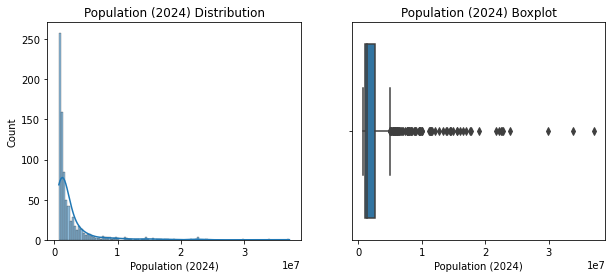

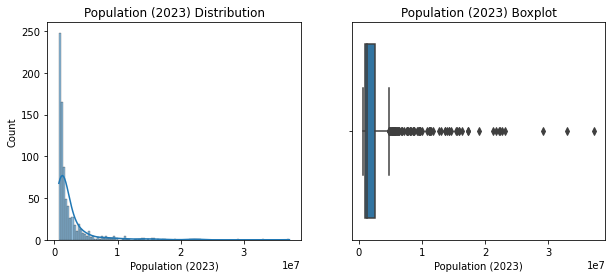

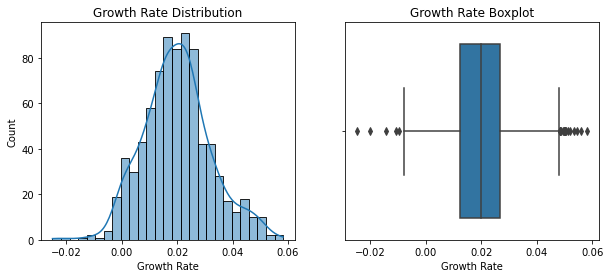

In [15]:
# Histograms and Boxplots for numerical features
numerical_feat=['Population (2024)','Population (2023)','Growth Rate']
for feature in numerical_feat:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Boxplot')

<AxesSubplot:xlabel='Continent'>

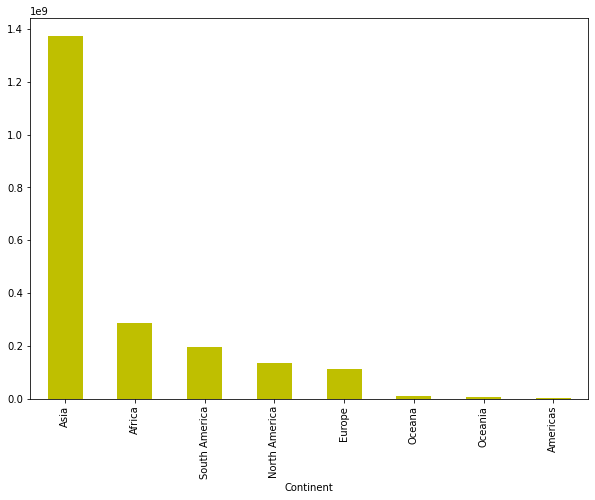

In [16]:
# Total population in 2024 by continent
df.groupby('Continent')['Population (2024)'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,7),color='y')

<AxesSubplot:xlabel='Country'>

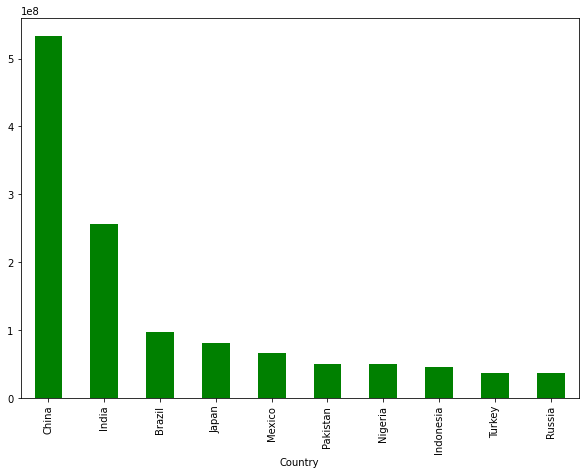

In [17]:
#Total population in 2023 by country
df.groupby('Country')['Population (2023)'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,7),color='g')

<AxesSubplot:xlabel='Continent'>

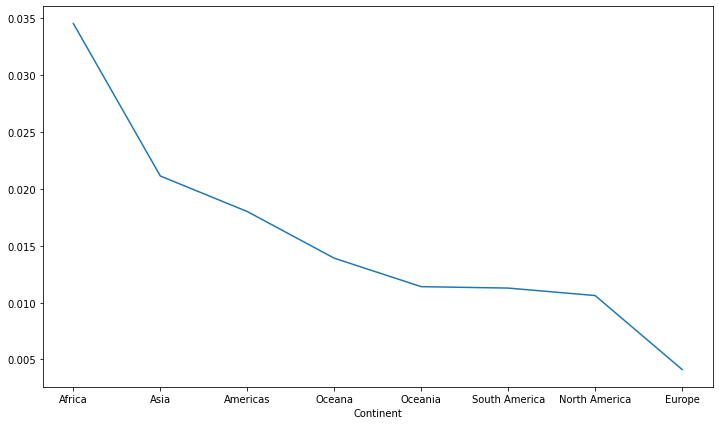

In [18]:
# Average growth rate by continent
df.head()
df.groupby('Continent')['Growth Rate'].mean().sort_values(ascending=False).head(10).plot(kind='line',figsize=(12,7))

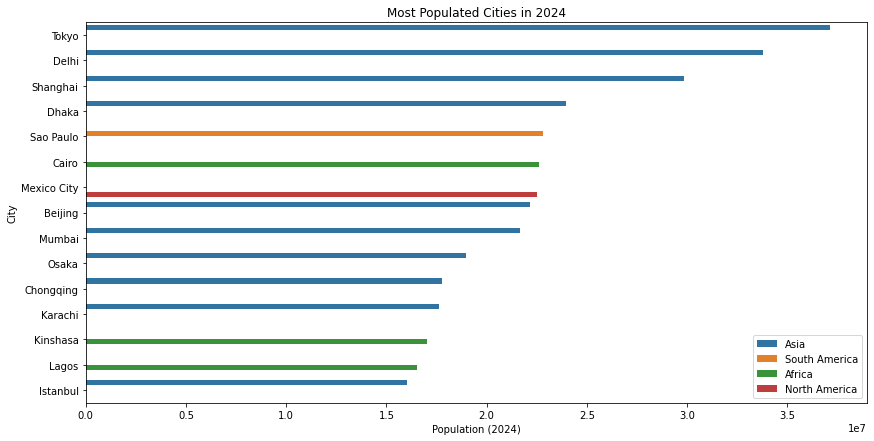

In [76]:
# Most populated cities in 2024
df.head()
df1=df[['City','Population (2024)','Continent','Population (2023)']].sort_values(by='Population (2024)',ascending=False).head(15)
plt.figure(figsize=(14,7))
sns.barplot( y=df1.City,x=df1['Population (2024)'],orient='h',hue=df1.Continent )
plt.title('Most Populated Cities in 2024')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Population (2023)', ylabel='Population (2024)'>

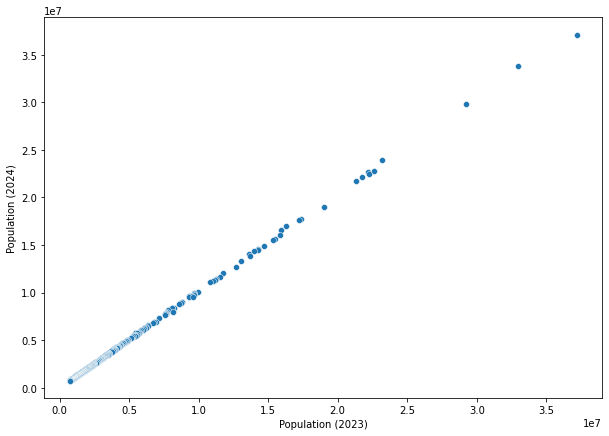

In [88]:
# Population in 2023 vs 2024
df.head()
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Population (2023)'],y=df['Population (2024)'])

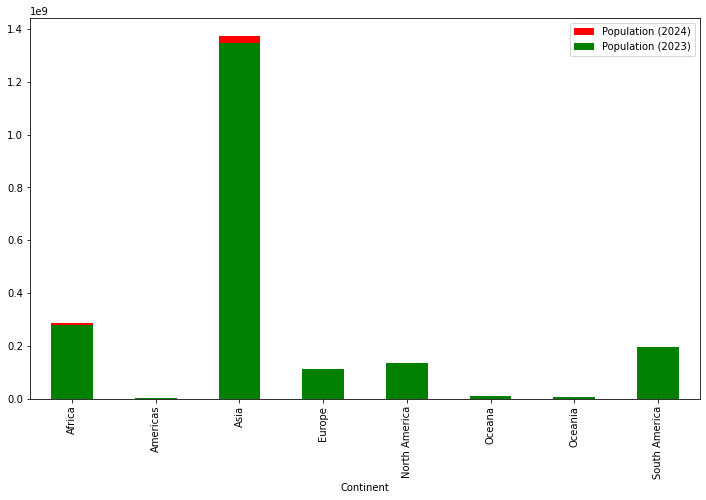

In [69]:
# Total population in 2024 and 2023 by continent
df.head()
df.groupby('Continent')['Population (2024)'].sum().plot(kind='bar',figsize=(12,7),color='r',label='Population (2024)')
df.groupby('Continent')['Population (2023)'].sum().plot(kind='bar',figsize=(12,7),color='g')
plt.legend()
plt.show()

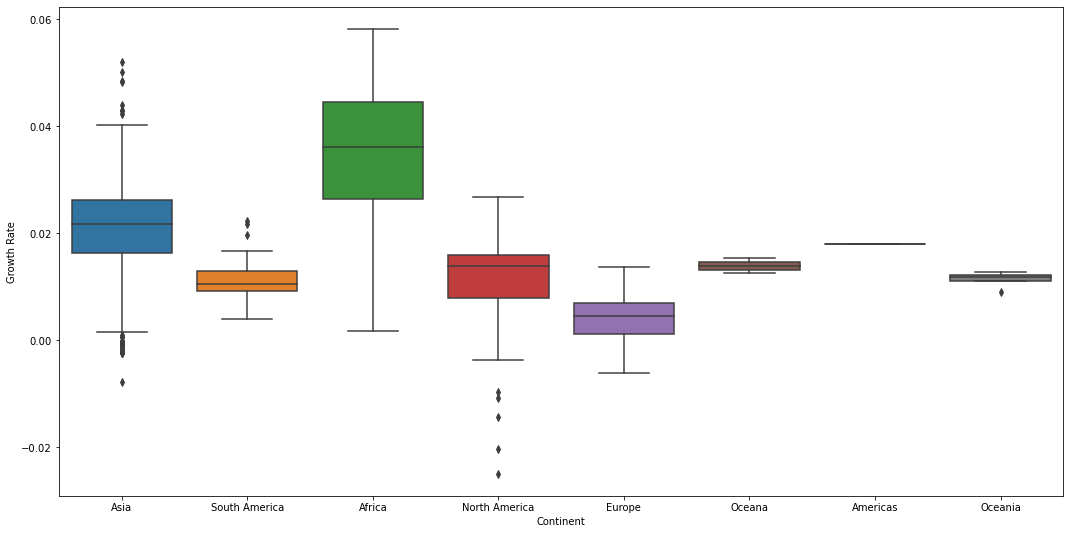

In [98]:
#Growth rate by continent
df
plt.figure(figsize=(18,9))
sns.boxplot(data=df, x='Continent', y='Growth Rate')
plt.show()